In [8]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

### Manually build a directed graph of prerequisites for CUNY MSDS

In [2]:
# keys for this dict are prerequisite for the classes in their value lists, e.g. 606 is needed for 605, 621, ...618
needed_for = {606: [605, 621, 620, 604, 612, 618],
              607: [602, 605, 620, 621, 612, 618, 644, 646],
              602: [608, 609, 612],
              605: [609],
              621: [622, 624, 631]}

required = [602, 605, 606, 607, 608, 621, 698]
elective = [604, 609, 612, 618, 620, 622, 624, 631, 644, 646]

In [3]:
beachhead = nx.DiGraph()

# first add all edges, from each prerequisite to the course that requires it
for class1 in needed_for:
    for class2 in needed_for[class1]:
        beachhead.add_edge(class1, class2)

# then assign attributes to each node, for required course or elective
for course in required:
    beachhead.add_node(course, status='required')
for course in elective:
    beachhead.add_node(course, status='elective')

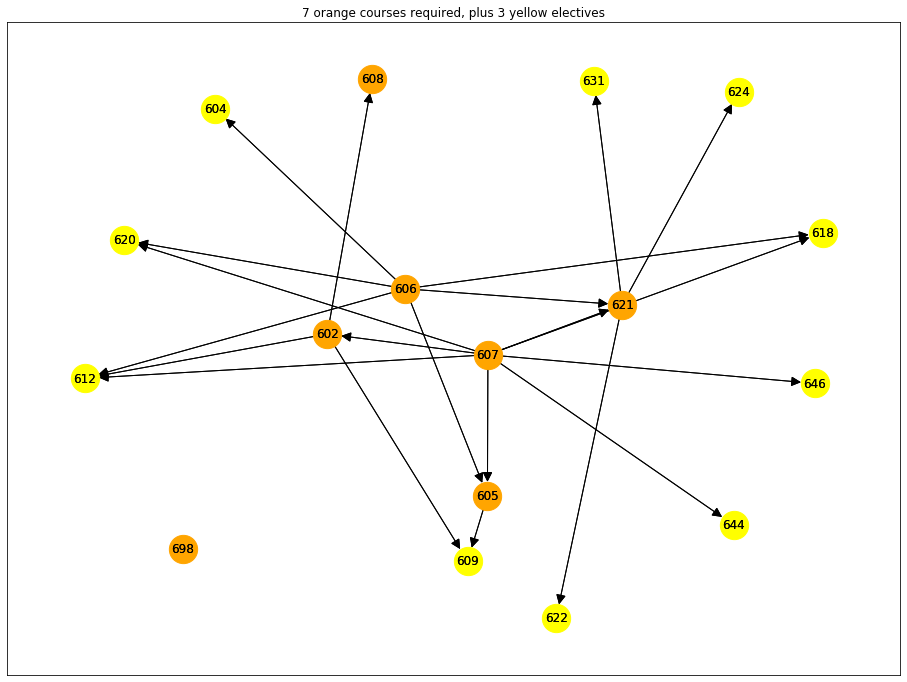

In [64]:
## https://networkx.org/documentation/latest/auto_examples/drawing/plot_labels_and_colors.html
plt.figure(figsize=(16, 12))
plt.title('7 orange courses required, plus 3 yellow electives')
position = nx.spring_layout(beachhead, seed=22)
nx.draw_networkx(beachhead, pos=position, node_size=800, arrowsize=20, nodelist=required, node_color='orange')
nx.draw_networkx(beachhead, pos=position, node_size=800, arrowsize=20, nodelist=elective, node_color='yellow');